/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Original ATR range: 2.999999999997449e-05 to 0.01417999999999986
Cleaned ATR range: 0.0006800000000000139 to 0.0017599999999999838
Q1: 0.0006800000000000139
Q3: 0.0017599999999999838


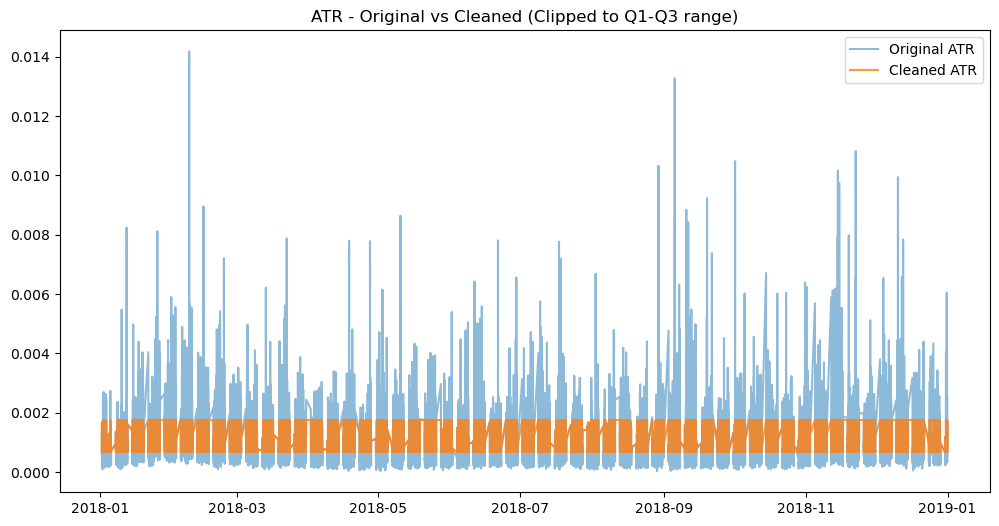

In [3]:
import pandas as pd
import talib
import numpy as np

# Load the data
df = pd.read_csv('/projects/genomic-ml/da2343/ml_project_2/data/gen_oanda_data/GBP_USD_M15_raw_data.csv', parse_dates=["time"])
df.set_index("time", inplace=True)

# Add time-based features
df["year"] = df.index.year
df["month"] = df.index.month
df["day_of_week"] = df.index.dayofweek
df["hour"] = df.index.hour
df["minute"] = df.index.minute

# Calculate ATR
df["atr"] = talib.ATR(df["high"], df["low"], df["close"], timeperiod=1)

# df["log_close"] = np.log(df["close"])
# df["log_high"] = np.log(df["high"])
# df["log_low"] = np.log(df["low"])
df["log_atr"] = np.log(df["atr"])

# Remove NaN values
df = df.dropna()

# Extract only year 2018
df = df[df["year"] == 2018]

# Calculate Q1 and Q3
Q1 = df['atr'].quantile(0.4)
Q3 = df['atr'].quantile(0.9)
IQR = Q3 - Q1

# Create the new 'atr_cleaned' column
df['atr_cleaned'] = df['atr'].clip(lower=Q1, upper=Q3)

# Print some statistics
print(f"Original ATR range: {df['atr'].min()} to {df['atr'].max()}")
print(f"Cleaned ATR range: {df['atr_cleaned'].min()} to {df['atr_cleaned'].max()}")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")

# Optional: Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['atr'], label='Original ATR', alpha=0.5)
plt.plot(df.index, df['atr_cleaned'], label='Cleaned ATR', alpha=0.8)
plt.title('ATR - Original vs Cleaned (Clipped to Q1-Q3 range)')
plt.legend()
plt.show()

In [4]:
df

,open,high,low,close,volume,year,month,day_of_week,hour,minute,atr,log_atr,atr_cleaned
time,,,,,,,,,,,,,
2018-01-01 22:00:00+00:00,1.35021,1.35153,1.35021,1.35149,66,2018,1,0,22,0,0.00132,-6.630124,0.00132
2018-01-01 22:15:00+00:00,1.35112,1.35152,1.35100,1.35101,16,2018,1,0,22,15,0.00052,-7.561682,0.00068
2018-01-01 22:30:00+00:00,1.35144,1.35163,1.35077,1.35098,86,2018,1,0,22,30,0.00086,-7.058578,0.00086
2018-01-01 22:45:00+00:00,1.35145,1.35238,1.35092,1.35180,141,2018,1,0,22,45,0.00146,-6.529319,0.00146
2018-01-01 23:00:00+00:00,1.35137,1.35238,1.35069,1.35196,3858,2018,1,0,23,0,0.00169,-6.383027,0.00169
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 20:45:00+00:00,1.27536,1.27538,1.27454,1.27458,525,2018,12,0,20,45,0.00084,-7.082109,0.00084
2018-12-31 21:00:00+00:00,1.27459,1.27555,1.27458,1.27534,395,2018,12,0,21,0,0.00097,-6.938214,0.00097
2018-12-31 21:15:00+00:00,1.27534,1.27557,1.27490,1.27542,1171,2018,12,0,21,15,0.00067,-7.308233,0.00068
